In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from datetime import date

df = pd.read_csv("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//scrapingAutoScoutDrivetrain.csv", encoding='unicode_escape', delimiter =",")

rel_score = [
            53, 53, 67, 56, 62, 67, 62,53, 60, 53, 71, 62, 62, 85, 80, 70, 40, 71, 87, 71, 64, 
            51, 71, 69, 60, 71, 38, 87, 60, 67, 60, 58, 64, 64, 40, 62, 64, 73, 80, 71, 50,  
            80, 62]

brands = ["Audi", "BMW", "Ford", "Mercedes-Benz", "Opel", "Renault", "Volkswagen",
            "Alfa Romeo", "Aston Martin", "Chevrolet", "Chrysler", "Citroen","Cupra", "Dacia",
            "Daihatsu", "Dodge", "Ferrari", "Fiat", "Honda", "Hyundai", "Infiniti", "Jaguar", "Jeep",
            "Kia","Lamborghini", "Lancia", "Land Rover", "Lexus", "Maserati", "Mazda", "MINI", "Mitsubishi",
            "Nissan", "Peugeot", "Porsche", "SEAT", "Skoda", "smart", "Subaru", "Suzuki", "Tesla",
            "Toyota", "Volvo"]

df['Brand reliability score'] = 0

for index, value in df['Manufacturer'].items():
    manufacturer = value
    i = brands.index(manufacturer)
    df["Brand reliability score"].at[index] = int(rel_score[i])

In [19]:
for index,value in df['Warranty'].items():
    if value > 5:
        df['Warranty'].at[index] = round(value/12)

In [20]:
df['Car reliability score'] = 0
current_year = date.today().year

car_ages = []
for index, value in df['First registration'].items():
    car_ages.append(current_year - value)

for index, value in df['Manufacturer'].items():
    
    manufacturer = value
    brand_score = df["Brand reliability score"].at[index]/10
    safe_sec = df["Safety & Security"].at[index] 
    if safe_sec < 2:
        safe_sec = 1
    elif safe_sec >= 2 and safe_sec < 7:
        safe_sec = 2   
    elif safe_sec >= 7 and safe_sec < 9:
        safe_sec = 3
    elif safe_sec >= 9 and safe_sec < 11:
        safe_sec = 4
    elif safe_sec >= 11 and safe_sec < 13:
        safe_sec = 5
    elif safe_sec >= 13 and safe_sec < 15:
        safe_sec = 6
    elif safe_sec >= 15 and safe_sec < 17:
        safe_sec = 7
    elif safe_sec >= 17 and safe_sec < 20:
        safe_sec = 8
    elif safe_sec >= 20 and safe_sec < 24:
        safe_sec = 9
    elif safe_sec >= 24:    
        safe_sec = 10
        
    warranty = df["Warranty"].at[index]
    if warranty < 1:
        warranty = 10
    elif warranty >= 1 and warranty <= 2:
        warranty = 9
    elif warranty > 2 and warranty < 5:
        warranty = 7
    elif warranty >= 5 and warranty < 8:
        warranty = 5
    elif warranty >= 8 and warranty < 10:
        warranty = 2
    elif warranty >= 10:  
        warranty = 1
        
    mileage = df["Mileage"].at[index]
    if mileage < 12124:
        mileage = 1
    elif mileage >= 12124 and mileage <= 21003:
        mileage = 2
    elif mileage > 21003 and mileage < 30007:
        mileage = 3
    elif mileage >= 30007 and mileage < 40111:
        mileage = 4
    elif mileage >= 40111 and mileage < 50423:
        mileage = 5
    elif mileage >= 50423 and mileage < 65998: 
        mileage = 6
    elif mileage >= 65998 and mileage < 84991:  
        mileage = 7
    elif mileage >= 84991 and mileage < 109985: 
        mileage = 8
    elif mileage >= 109985 and mileage < 152500: 
        mileage = 9
    elif mileage >= 152500:  
        mileage = 10
        
    prev_owner = ((df["Previous owner"].at[index]-df["Previous owner"].min())/(df["Previous owner"].max()-df["Previous owner"].min()))*10
    car_age = (car_ages[index] - min(car_ages))/(max(car_ages) - min(car_ages))*10
    if car_age == 0:
        car_age = 1
        
    if prev_owner == 0:
        prev_owner = 1
    
    df["Car reliability score"].at[index] = round(brand_score*safe_sec*warranty)/((mileage)*(prev_owner)*(car_age))
    #df["Car reliability score"].at[index] = round(1+(df["Car reliability score"].at[index]-df["Car reliability score"].min())*(100-1)/(df["Car reliability score"].max()-df["Car reliability score"].min()))
df["Car reliability score"] = np.log(df['Car reliability score'])
for index, value in df['Car reliability score'].items():
    df["Car reliability score"].at[index] = round(1+(df["Car reliability score"].at[index]-df["Car reliability score"].min())*(10)/(df["Car reliability score"].max()-df["Car reliability score"].min()))


In [21]:
counter = df.groupby('Car reliability score')['Car reliability score'].count().tail(10)

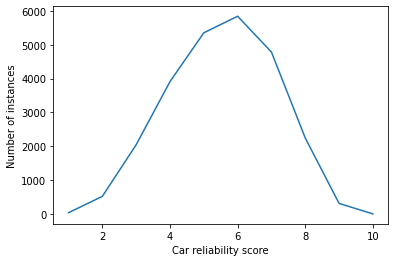

In [22]:
plt.ylabel("Number of instances")
counter.plot()
plt.savefig("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//images//rel_score.png")

In [23]:
df.drop(df.columns[49], axis = 1, inplace = True)
pd.DataFrame(df.corr()["Price"].sort_values(ascending=False).head(50))[1:]

,Price
Power,0.726118
Engine size,0.485173
Cylinders,0.464189
Empty weight,0.451045
Car reliability score,0.421725
Gearbox,0.401004
Comfort & Convenience,0.371717
First registration,0.370952
Upholstery,0.362813
Gears,0.362324


In [24]:
df.to_csv("C://Users//matte//OneDrive//Desktop//data mining//datasetAutoScout//scrapingAutoScoutCompleteRelScoreDrivetrain.csv", index=False)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25039 entries, 0 to 25038
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Body type                              25039 non-null  object 
 1   CO2 Emissions                          25039 non-null  float64
 2   Colour                                 25039 non-null  object 
 3   Comfort & Convenience                  25039 non-null  int64  
 4   Country                                25039 non-null  object 
 5   Cylinders                              25039 non-null  int64  
 6   Doors                                  25039 non-null  int64  
 7   4WD                                    25039 non-null  int64  
 8   Emission class                         25039 non-null  int64  
 9   Empty weight                           25039 non-null  int64  
 10  Engine size                            25039 non-null  int64  
 11  En